Virtual Environments and Requests Module

In [2]:
#sending a request and logging the response code

import requests

r = requests.get("https://api.github.com/users/Connor-SM")

print(r)
print(type(r))

<Response [200]>
<class 'requests.models.Response'>


In [3]:
#accessing the content that we requested from the URL
data = r.content
print(data)

b'{"login":"Connor-SM","id":20958711,"node_id":"MDQ6VXNlcjIwOTU4NzEx","avatar_url":"https://avatars.githubusercontent.com/u/20958711?v=4","gravatar_id":"","url":"https://api.github.com/users/Connor-SM","html_url":"https://github.com/Connor-SM","followers_url":"https://api.github.com/users/Connor-SM/followers","following_url":"https://api.github.com/users/Connor-SM/following{/other_user}","gists_url":"https://api.github.com/users/Connor-SM/gists{/gist_id}","starred_url":"https://api.github.com/users/Connor-SM/starred{/owner}{/repo}","subscriptions_url":"https://api.github.com/users/Connor-SM/subscriptions","organizations_url":"https://api.github.com/users/Connor-SM/orgs","repos_url":"https://api.github.com/users/Connor-SM/repos","events_url":"https://api.github.com/users/Connor-SM/events{/privacy}","received_events_url":"https://api.github.com/users/Connor-SM/received_events","type":"User","site_admin":false,"name":"Connor Milliken","company":"HubSpot, Inc.","blog":"www.connormilliken.c

In [4]:
#converting data from JSON into a Python dictionary and outputting all key-value pairs
data =r.json() #converting the data from a string to a dictionary
for k,v in data.items():
    print("Key: {} \t Value: {}".format(k,v))
print(data['name']) #accessing data directly

Key: login 	 Value: Connor-SM
Key: id 	 Value: 20958711
Key: node_id 	 Value: MDQ6VXNlcjIwOTU4NzEx
Key: avatar_url 	 Value: https://avatars.githubusercontent.com/u/20958711?v=4
Key: gravatar_id 	 Value: 
Key: url 	 Value: https://api.github.com/users/Connor-SM
Key: html_url 	 Value: https://github.com/Connor-SM
Key: followers_url 	 Value: https://api.github.com/users/Connor-SM/followers
Key: following_url 	 Value: https://api.github.com/users/Connor-SM/following{/other_user}
Key: gists_url 	 Value: https://api.github.com/users/Connor-SM/gists{/gist_id}
Key: starred_url 	 Value: https://api.github.com/users/Connor-SM/starred{/owner}{/repo}
Key: subscriptions_url 	 Value: https://api.github.com/users/Connor-SM/subscriptions
Key: organizations_url 	 Value: https://api.github.com/users/Connor-SM/orgs
Key: repos_url 	 Value: https://api.github.com/users/Connor-SM/repos
Key: events_url 	 Value: https://api.github.com/users/Connor-SM/events{/privacy}
Key: received_events_url 	 Value: https://

In [7]:
#outputting specifit key-value pairs from data
r = requests.get("https://api.github.com/search/repositories?q=language:python")
data = r.json()
print(data["total_count"]) #output the total number of repositories that use python

6274007


Monday Exercises

In [1]:
#1 Test Environment

In [6]:
#2 JavaScript Repositories
import requests

r = requests.get("https://api.github.com/search/repositories?q=language:javascript")
data=r.json()
print(data['total_count'])

12924591


Tuesday: Pansdas

In [2]:
#importing the pands library
import pandas as pd # industry stadard name of pd when importing

In [3]:
#using the from_dict method ot convert a dictionary into a Pandas DataFrame
import random

random.seed(3) #generate same random numbers every time, number used doesn't matter

names = ['Jess', 'Jordan', 'Sandy', 'Ted', 'Barney', 'Tyler', 'Rebecca']
ages = [random.randint(18, 35) for x in range(len(names))]

people = {'names' : names, "ages" : ages}

df = pd.DataFrame.from_dict(people)
print(df)

     names  ages
0     Jess    25
1   Jordan    35
2    Sandy    22
3      Ted    29
4   Barney    33
5    Tyler    20
6  Rebecca    18


In [4]:
#directly selecting a column in Pandas
print(df['ages'])
print(df['ages'][3]) #select the value of "ages" in the fourth row (0-index based)

#print(df[4]) doesn't work, 4 is not column name

0    25
1    35
2    22
3    29
4    33
5    20
6    18
Name: ages, dtype: int64
29


In [5]:
#directly selecting a record in Pandas using .loc
print(df.loc[0])
print(df.loc[0]['names']) #selecting the value at record 0 in the 'names' column

names    Jess
ages       25
Name: 0, dtype: object
Jess


In [6]:
#slicing a DataFrame to grab specific records
print(df[2:5])

    names  ages
2   Sandy    22
3     Ted    29
4  Barney    33


In [7]:
#accessing the top 5 records using .head()
df.head(5)

,names,ages
0,Jess,25
1,Jordan,35
2,Sandy,22
3,Ted,29
4,Barney,33


In [8]:
#accessing the bottom 3 records using .tail()
df.tail(3)

,names,ages
4,Barney,33
5,Tyler,20
6,Rebecca,18


In [9]:
#accessing the column headers (keys) using the .keys() method
headers = df.keys()
print(headers)

Index(['names', 'ages'], dtype='object')


In [10]:
#checking the shape, which is the number of records and columns
print(df.shape)

(7, 2)


In [11]:
#checking the general statistics of the DataFrame using .describe() only works on numerical columns
df.describe()

,ages
count,7.000000
mean,26.000000
std,6.531973
min,18.000000
25%,21.000000
50%,25.000000
75%,31.000000
max,35.000000


In [12]:
#sort based on a given column, but keep the DataFrame in tact using sort_values()
df = df.sort_values("ages")
df.head(5)

,names,ages
6,Rebecca,18
5,Tyler,20
2,Sandy,22
0,Jess,25
3,Ted,29


In [13]:
#using a conditional to create a true/false column to work with
can_drink = df['ages'] > 21
print(can_drink)

6    False
5    False
2     True
0     True
3     True
4     True
1     True
Name: ages, dtype: bool


In [14]:
#using subsetting to filter out records and keep DataFrame intact
df[df['ages'] > 21]

,names,ages
2,Sandy,22
0,Jess,25
3,Ted,29
4,Barney,33
1,Jordan,35


In [17]:
#generating a new column of fake data for each record in the DataFrame to represent customer tenure
random.seed(321)

tenure = [random.randint(0,10) for x in range(len(df))]

df['tenure'] = tenure #same as adding a new key-value fair in a dictionary
df.head()

,names,ages,tenure
6,Rebecca,18,4
5,Tyler,20,6
2,Sandy,22,2
0,Jess,25,5
3,Ted,29,8


In [19]:
#feature engineering a new column from known data using a UDF
def ageGroup(age):
    return "Teenager" if age < 21 else "Adult"
df["age_group"] = df["ages"].apply(ageGroup)
df.head(10)

,names,ages,tenure,age_group
6,Rebecca,18,4,Teenager
5,Tyler,20,6,Teenager
2,Sandy,22,2,Adult
0,Jess,25,5,Adult
3,Ted,29,8,Adult
4,Barney,33,7,Adult
1,Jordan,35,5,Adult


In [20]:
#grouping the records together to count how many records in each group
df.groupby("age_group", as_index = False).count().head()

,age_group,names,ages,tenure
0,Adult,5,5,5
1,Teenager,2,2,2


In [21]:
#grouping the data to see averages of all columns
df.groupby("age_group", as_index = False).mean().head()

,age_group,ages,tenure
0,Adult,28.8,5.4
1,Teenager,19.0,5.0


In [22]:
#grouping information by their age group, then by their tenure
df.groupby(["age_group", "tenure"], as_index = False).count().head()

,age_group,tenure,names,ages
0,Adult,2,1,1
1,Adult,5,2,2
2,Adult,7,1,1
3,Adult,8,1,1
4,Teenager,4,1,1


In [24]:
#adding a record to the bottom of the DataFrame
df.loc[7] = ["Jess",25, 2, "Adult"] #add a record
df.head(10)

,names,ages,tenure,age_group
6,Rebecca,18,4,Teenager
5,Tyler,20,6,Teenager
2,Sandy,22,2,Adult
0,Jess,25,5,Adult
3,Ted,29,8,Adult
4,Barney,33,7,Adult
1,Jordan,35,5,Adult
7,Jess,25,2,Adult


In [26]:
#removing duplicates based on same names
df = df.drop_duplicates(subset = "names")
df.head(10)

,names,ages,tenure,age_group
6,Rebecca,18,4,Teenager
5,Tyler,20,6,Teenager
2,Sandy,22,2,Adult
0,Jess,25,5,Adult
3,Ted,29,8,Adult
4,Barney,33,7,Adult
1,Jordan,35,5,Adult


In [27]:
#creating another fake DataFrame to work with, having same names and a new ratings colum
ratings = {"names" : ["Jess", "Tyler", "Ted"],
          "ratings" : [10, 9, 6]
          }
ratings = df.from_dict(ratings)
ratings.head()

,names,ratings
0,Jess,10
1,Tyler,9
2,Ted,6


In [28]:
#performing an inner join with our df and ratings DataFrames based on names, get data that matches
matched_ratings = df.merge(ratings, on="names", how="inner")
matched_ratings.head()

,names,ages,tenure,age_group,ratings
0,Tyler,20,6,Teenager,9
1,Jess,25,5,Adult,10
2,Ted,29,8,Adult,6


In [29]:
#performing an outer join with our df and ratings DataFrames based on names, get all data
all_ratings = df.merge(ratings, on = 'names', how = "outer")
all_ratings.head()

,names,ages,tenure,age_group,ratings
0,Rebecca,18,4,Teenager,NaN
1,Tyler,20,6,Teenager,9.0
2,Sandy,22,2,Adult,NaN
3,Jess,25,5,Adult,10.0
4,Ted,29,8,Adult,6.0


Tuesday Exercises

In [31]:
#1 Loading a Dataset

import pandas as pd

Trump = pd.read_csv('trump_insult_tweets_2014_to_2021.csv')

Trump.head(5)
    

,Unnamed: 0,date,target,insult,tweet
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."


In [34]:
#2 Dataset Analysis

import pandas as pd

Trump = pd.read_csv('trump_insult_tweets_2014_to_2021.csv')

print(len(Trump))

print(type(Trump["date"]), type(Trump["target"]), type(Trump["insult"]), type(Trump["tweet"]))



10360
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


Matplotlib

In [2]:
#importing the matplotlib library 
from matplotlib import pyplot as plt #industry standard name of plt when importing

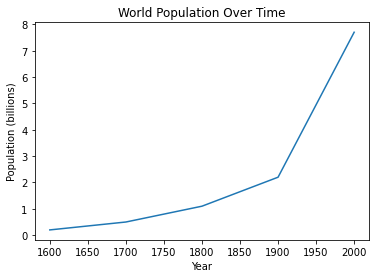

In [4]:
#creating a line plot using x and y coords
x, y = [1600, 1700, 1800, 1900, 2000], [0.2, 0.5, 1.1, 2.2, 7.7]
plt.plot(x,y) #creates the line
plt.title("World Population Over Time")
plt.xlabel("Year")
plt.ylabel("Population (billions)")
plt.show()

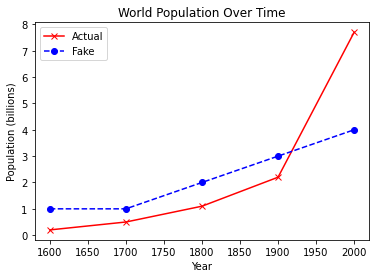

In [5]:
#creating a line plot with multiple lines
x1, y1 = [1600, 1700, 1800, 1900, 2000], [0.2, 0.5, 1.1, 2.2, 7.7]
x2, y2 = [1600,1700,1800,1900,2000], [1,1,2,3,4]

plt.plot(x1,y1, "rx-", label = "Actual") #create a red solid line with x dots
plt.plot(x2,y2, "bo--", label = "Fake") #create a blue dashed line with circle dots

plt.title("World Population Over Time")
plt.xlabel("Year")
plt.ylabel("Population (billions)")
plt.legend() #show labels in best corner
plt.show()


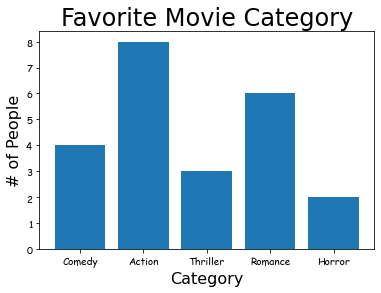

In [7]:
#creating a bar plot using x and y coords

num_people, categories = [4,8,3,6,2], ["Comedy", "Action", "Thriller", "Romance", "Horror"]

plt.bar(categories, num_people)

plt.title("Favorite Movie Category", fontsize = 24)
plt.xlabel("Category", fontsize = 16)
plt.ylabel("# of People", fontsize = 16)
plt.xticks(fontname = "Fantasy")
plt.yticks(fontname = "Fantasy")
plt.show()

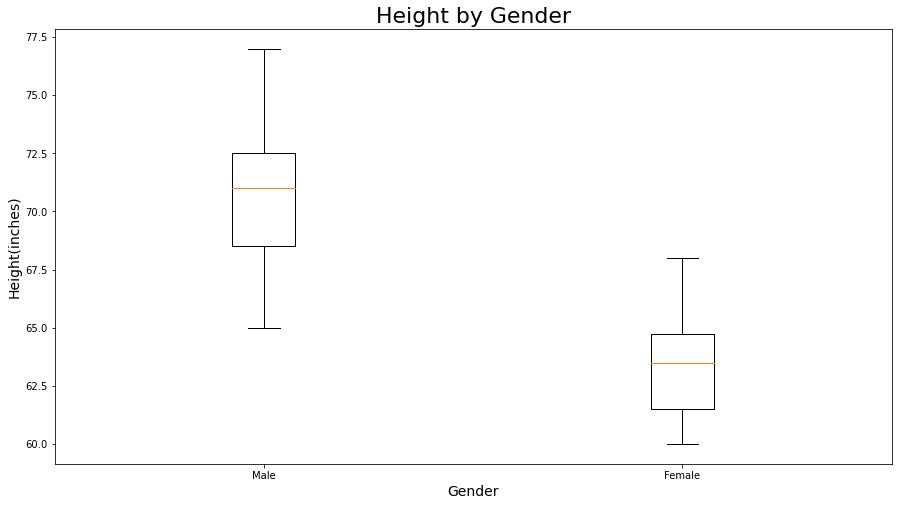

In [11]:
#creating a box plot - showing height data for male-female

males, females = [72,68,65,77,73,71,69], [60,65,68,61,63,64]
heights = [males, females]

plt.figure(figsize=(15,8)) #makes chart bigger
plt.boxplot(heights) #takes in list of data, each box is its' own array, heights contains two lists

plt.xticks([1,2], ["Male", "Female"]) #sets number of ticks and labels on x-axis
plt.title("Height by Gender", fontsize = 22)
plt.ylabel("Height(inches)", fontsize = 14)
plt.xlabel("Gender", fontsize = 14)
plt.show()

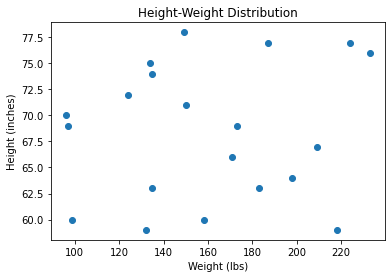

In [16]:
##creating a scatter plot to represent height-weight distributino
import random
random.seed(2)

height = [randint(58,78) for x in range(20)] #20 records between 4'10" and 6'6"
weight = [randint(90,250) for x in range(20)] #20 records between 90lbs. and 250lbs.

plt.scatter(weight, height)

plt.title("Height-Weight Distribution")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (inches)")

plt.show()

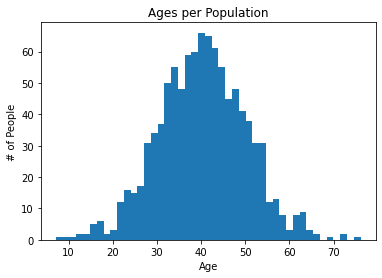

In [18]:
#creating a histogram to show age data for a fake population
import numpy as np #import the numpy module to generate data
np.random.seed(5)

ages= [np.random.normal(loc=40, scale = 10) for x in range(1000)] #ages distributes around 40

plt.hist(ages, bins = 45) #bins is the number of bars

plt.title("Ages per Population")
plt.xlabel("Age")
plt.ylabel("# of People")
plt.show()


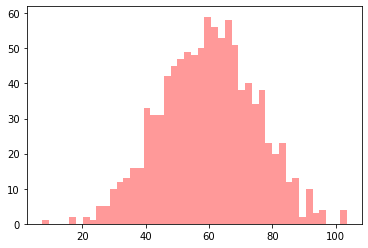

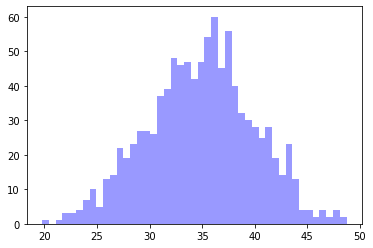

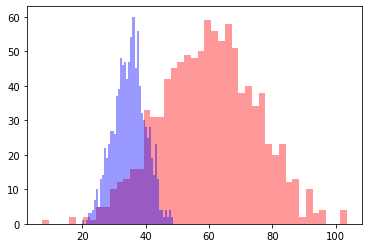

In [19]:
#showing the importance of histogram's display central distribution
florida = [np.random.normal(loc = 60, scale = 15) for x in range(1000)] #assume numpy is imported
california = [np.random.normal(loc=35, scale = 5) for x in range(1000)] 

#chart 1
plt.hist(florida, bins = 45, color = "r", alpha = 0.4) #alpha is opacity, making it see through
plt.show()

#chart 2
plt.hist(california, bins =45, color ="b", alpha =0.4) #alpha is opacity, making it see through
plt.show()

#chart 3
plt.hist(florida, bins = 45, color = "r", alpha = 0.4) #alpha is opacity, making it see through
plt.hist(california, bins = 45, color = "b", alpha = 0.4) #alpha is opacity, making it see through
plt.show()

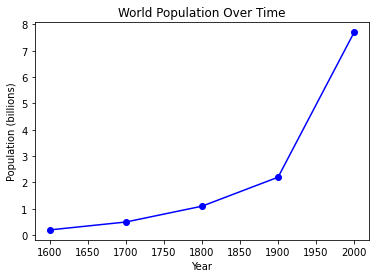

In [20]:
#using savefig method to save the chart as a jpg to the local folder
x, y = [1600, 1700, 1800, 1900, 2000], [0.2, 0.5, 1.1, 2.2, 7.7]

plt.plot(x,y,"bo-") #creates a blue solid line with circle dots

plt.title("World Population Over Time")
plt.xlabel("Year")
plt.ylabel("Population (billions)")

plt.savefig("population.jpg")

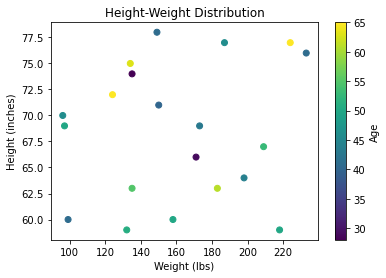

In [21]:
#creating a scatter plot to represent height-weight distribution
import random
random.seed(2)

height = [randint(58,78) for x in range(20)]
weight = [randint(90,250) for x in range(20)]
age = [randint(18,65) for x in range(20)] #20 records between 18 and 65 years old

plt.scatter(weight, height, c=age) #sets the age list to be shown by color

plt.title("Height-Weight Distribution")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (inches)")
plt.colorbar(label = "Age") #adds color bar to right side

plt.show()

Wednesday Exercises

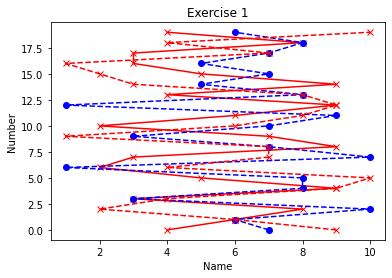

In [28]:
#1 Three Line Plot
import matplotlib, random

x1, y1 = [randint (1,10) for x in range(20)], [x for x in range(20)]
x2, y2 = [randint (1,10) for x in range(20)], [x for x in range(20)]
x3, y3 = [randint (1,10) for x in range(20)], [x for x in range(20)]

plt.plot(x1,y1,"rx-", label = "Hello")
plt.plot(x2,y2,"bo--", label = "World")
plt.plot(x3,y3,"rx--", label = "Bye")

plt.title("Exercise 1")
plt.xlabel("Name")
plt.ylabel("Number")

plt.show()

What would you rate this movie (1-5)? 5
Is there another user that would like to review (y/n)? 2
What would you rate this movie (1-5)? 3
Is there another user that would like to review (y/n)? 1
What would you rate this movie (1-5)? 34
Is there another user that would like to review (y/n)? 23
What would you rate this movie (1-5)? 4512
Is there another user that would like to review (y/n)? 34
What would you rate this movie (1-5)? n
Is there another user that would like to review (y/n)? n


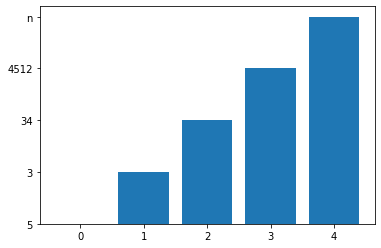

In [32]:
#2 User Information
from matplotlib import pyplot as plt

def Program():
    credit_data = []
    credit_user = []
    ans = True
    i = 0
    while ans:
        credit = input("What would you rate this movie (1-5)? ")
        credit_user.append(i)
        credit_data.append(credit)
        i += 1
        check = input("Is there another user that would like to review (y/n)? ").lower()
        if check == "y":
            continue
        elif check == "n":
            ans = False
    
    plt.bar(credit_user,credit_data)
    
Program()
        

Web Scraping

In [1]:
#importing the beautiful soup and requests library
from bs4 import BeautifulSoup
import requests

In [2]:
#performing a request and outputting the status code
page = requests.get("http://www.arthurleej.com/e-love.html")
print(page)

<Response [200]>


In [3]:
#outputting the request response content
print(page.content)

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\r<html>\r<head>\r\t<title>Essay on Love by Arthur Lee Jacobson</title>\r<meta name="description" content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson.">\r<meta name="keywords" content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington">\r<meta name="resource-type" content="document">\r<meta name="generator" content="BBEdit 4.5">\r<meta name="robots" content="all">\r<meta name="classification" content="Gardening">\r<meta name="distribution" content="global">\r<meta name="rating" content="general">\r<meta name="copyright" content="2001 Arthur Lee Jacobson">\r<meta name="author" content="eriktyme@eriktyme.com">\r<meta name="language" content="en-us">\r</head>\r<body background="images/background1a.jpg" bgcolor="#FFFFCC" text="#000000" link="#00

In [4]:
#turning the response into a BeautifulSoup object to extract data
soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<html>
 <head>
  <title>
   Essay on Love by Arthur Lee Jacobson
  </title>
  <meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/>
  <meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/>
  <meta content="document" name="resource-type"/>
  <meta content="BBEdit 4.5" name="generator"/>
  <meta content="all" name="robots"/>
  <meta content="Gardening" name="classification"/>
  <meta content="global" name="distribution"/>
  <meta content="general" name="rating"/>
  <meta content="2001 Arthur Lee Jacobson" name="copyright"/>
  <meta content="eriktyme@eriktyme.com" name="author"/>
  <meta content="en-us" name="language"/>
 </head>
 <body alink="#33CC33" background="images/background1a.jpg" b

In [5]:
#using the find method to scrape the text within the first bold tag
title = soup.find("b")
print(title)
print(title.get_text()) #extracts all text within element

<b>Love</b>
Love


In [6]:
#get all text within the bold element tag then output each
poem_text = soup.find_all("b")
for text in poem_text:
    print(text.get_text())

Love
    Of the fourteen essays I'm writing, only this one treats an emotion. That love is the most important emotion is the deduction. I think other emotions may be as important, but are not so powerfully moving or interesting to most of us. Love is exciting. There is no need to justify choosing to write about it. Are not most songs love songs? Are not most novels stories featuring love?
    Love in its broad sense is the feeling of strong attraction, and often attachment and protection. It is felt towards other people, towards pets, towards inanimate objects, towards abstractions such as patriotism, religious matters, hobbies, and I suppose nearly everything. It is multifaceted, and includes ordinary self-love, chivalrous love, carnal or sexual love, friendly love, family love. It is an emotion that is closely related to certain others, such as hope. At its simplest level it is what we strongly like.
    I have a hunch that love, like the rose, owes much of its appeal to our mainstre

In [9]:
#finding an element by specific attribute key-values
page = requests.get("https://github.com/Connor-SM")
soup = BeautifulSoup(page.content, "html.parser")
username = soup.find('span', attrs = {"class" : "vcard-username"}) #find first span within this class

print(username) #will show that element has class of vcard-username among others
print(username.get_text())

<span class="p-nickname vcard-username d-block" itemprop="additionalName">Connor-SM</span>
Connor-SM


In [10]:
#traversing through the DOM using Beautiful Soup - using the childer attribute
page = requests.get("http://www.arthurleej.com/e-love.html")
soup = BeautifulSoup(page.content, "html.parser")
print(soup.children) #outputs an iterator object

In [11]:
#understanding the children within the soup object
for child in list(soup.children):
    print(type(child))

<class 'bs4.element.Doctype'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>


In [13]:
#accessing the .Tag object which holds the html - trying to access the title tag
html = list(soup.children)[2]
for section in html:
    print("\n\n Start of new section")
    print(section)



 Start of new section
 


 Start of new section
<head> <title>Essay on Love by Arthur Lee Jacobson</title> <meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/> <meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/> <meta content="document" name="resource-type"/> <meta content="BBEdit 4.5" name="generator"/> <meta content="all" name="robots"/> <meta content="Gardening" name="classification"/> <meta content="global" name="distribution"/> <meta content="general" name="rating"/> <meta content="2001 Arthur Lee Jacobson" name="copyright"/> <meta content="eriktyme@eriktyme.com" name="author"/> <meta content="en-us" name="language"/> </head>


 Start of new section
 


 Start of new section
<body alink="#33CC33" background="images/background1a.jpg

In [14]:
#accessing the head element using the children attribute
head = list(html.children)[1]
for item in head:
    print("\n\n New Tag")
    print(item)



 New Tag
 


 New Tag
<title>Essay on Love by Arthur Lee Jacobson</title>


 New Tag
 


 New Tag
<meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/>


 New Tag
 


 New Tag
<meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/>


 New Tag
 


 New Tag
<meta content="document" name="resource-type"/>


 New Tag
 


 New Tag
<meta content="BBEdit 4.5" name="generator"/>


 New Tag
 


 New Tag
<meta content="all" name="robots"/>


 New Tag
 


 New Tag
<meta content="Gardening" name="classification"/>


 New Tag
 


 New Tag
<meta content="global" name="distribution"/>


 New Tag
 


 New Tag
<meta content="general" name="rating"/>


 New Tag
 


 New Tag
<meta content="2001 Arthur Lee Jacobson" name="copyright"/>


 New Tag
 


 New Tag
<m

In [15]:
#scraping the title text
title = list(head)[1]
print(title.string) #.string is used to extract text as well
print(type(title.string)) #results in NavigableString
print(title.get_text())

Essay on Love by Arthur Lee Jacobson
<class 'bs4.element.NavigableString'>
Essay on Love by Arthur Lee Jacobson


Thursday Exercises

In [25]:
#1 Word Count
from bs4 import BeautifulSoup
import requests

page = requests.get("https://www.york.ac.uk/teaching/cws/wws/webpage1.html")

soup = BeautifulSoup(page.content, "html.parser")

print(soup.get_text)

<bound method Tag.get_text of <hmtl>
<head>
<title>webpage1</title>
</head>
<body alink="8B4513" bgcolor="FFFFFf" link="006666" vlink="006666">
<table align="center" width="75%">
<tr>
<td>
<div align="center"><h1>STARTING . . . </h1></div>
<div align="justify"><p>There are lots of ways to create web pages using already coded programmes. These lessons will teach you how to use the underlying HyperText Markup Language -  HTML. 
<br/>
<p>HTML isn't computer code, but is a language that uses US English to enable texts (words, images, sounds) to be inserted and formatting such as colo(u)r and centre/ering to be written in. The process is fairly simple; the main difficulties often lie in small mistakes - if you slip up while word processing your reader may pick up your typos, but the page will still be legible. However, if your HTML is inaccurate the page may not appear - writing web pages is, at the least, very good practice for proof reading!</p>
<p>Learning HTML will enable you to:
<ul>
<

In [42]:
#Question Number 2
from bs4 import BeautifulSoup
import requests

page = requests.get("https://en.wikipedia.org/wiki/List_of_current_National_Football_League_stadiums")

soup = BeautifulSoup(page.content, "html.parser")

#print(soup.prettify())

texts = soup.find_all("th", attrs = {"scope" : "row"})

for text in texts:
    print(text.get_text())

Allegiant Stadium

Arrowhead Stadium

AT&T Stadium

Bank of America Stadium

Bills Stadium

Empower Field at Mile High

FedExField

FirstEnergy Stadium

Ford Field

Gillette Stadium

Hard Rock Stadium

Heinz Field

Lambeau Field

Levi's Stadium

Lincoln Financial Field

Lucas Oil Stadium

Lumen Field

M&T Bank Stadium

Mercedes-Benz Stadium

Mercedes-Benz Superdome

MetLife Stadium

Nissan Stadium

NRG Stadium

Paul Brown Stadium

Raymond James Stadium

SoFi Stadium

Soldier Field

State Farm Stadium

TIAA Bank Field

U.S. Bank Stadium

Estadio Azteca

Tom Benson Hall of Fame Stadium

Wembley Stadium

Tottenham Hotspur Stadium

Future Buffalo Bills stadium

Future Washington Stadium

AFC
NFC
Hall of Fame Game
Pro Bowl
International Series
AFC
NFC
Seasons
History
Business
Other


Friday Project: Website Analysis

In [1]:
#import all necessary libraries
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from bs4.element import Comment
from IPython.display import clear_output

Enter a website to analyze: http://www.microsoft.com/en-us
The top word is: Microsoft


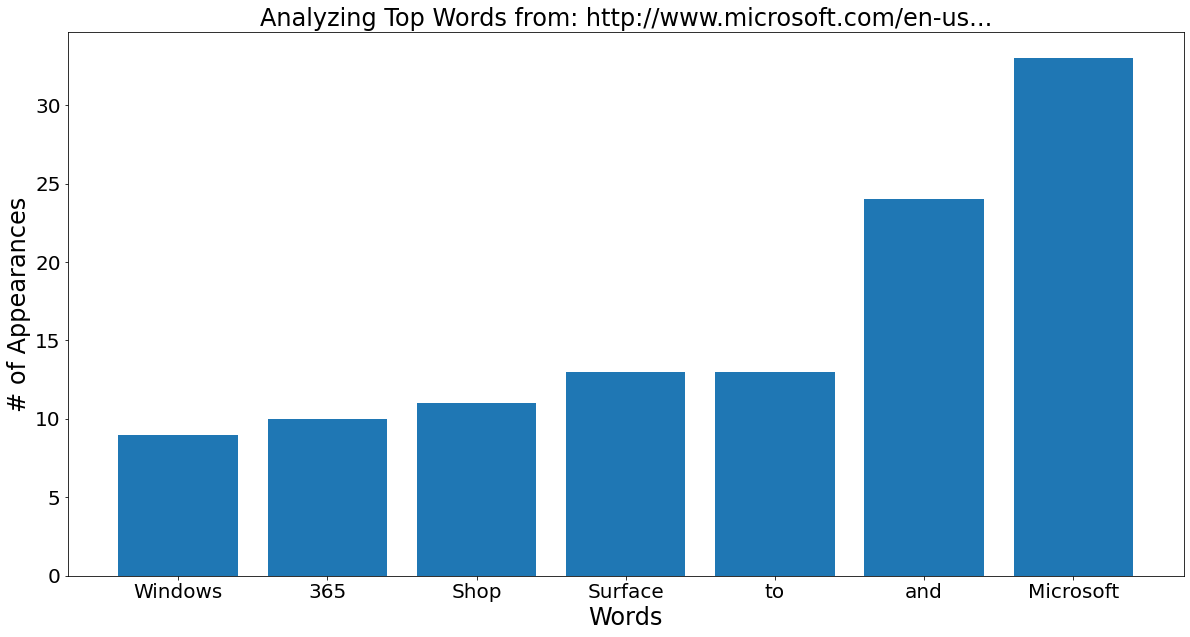

KeyboardInterrupt: Interrupted by user

In [29]:
#graph results of top 7 words
def displayResults(words, site):
    count = [item[1] for item in words][::-1] #reverses order
    word = [item[0] for item in words][:: -1] #gets word out of reverses order
    
    plt.figure(figsize = (20, 10)) #define how large the figure appears
    
    plt.bar(word, count)
    
    plt.title("Analyzing Top Words from: {}...".format(site[:50]), fontname="Sans Serif", fontsize = 24)
    plt.xlabel("Words", fontsize = 24)
    plt.ylabel("# of Appearances", fontsize  = 24)
    plt.xticks(fontname = "Sans Serif", fontsize = 20)
    plt.yticks(fontname = "Sans Serif", fontsize = 20)
    
    plt.show()

#filter article words and hidden characters
def filterWaste(word):
    bad_words = ("the", 'a', "in", "of", "to", "you", "/xa0", "and", "at", "on", "for", "from", "is", "that", "his",
                "are", "be", "-," "as", "&," "they", "with", "how", 'was', "her", "him", "i", "has", '|')
    
    if word.lower in bad_words:
        return False
    
    else:
        return True


#filter out all elements that do not contain text that appears on site
def filterTags(element):
    if element.parent.name in ["style", "script", "head", "title", "meta", "[document]"]:
        return False
    
    if isinstance(element, Comment):
        return False
    
    return True

#request site and return top 7 most used words
def scrape(site):
    page = requests.get(site)
    
    soup = BeautifulSoup(page.content, "html.parser")
    
    #print(soup.prettify()) #remove after runs properly
    
    text = soup.find_all(text=True) #will get all text within the document
    
    visible_text = filter(filterTags, text)
    
    word_count ={}
    
    for text in visible_text:
        #print(text) #remove afte runs properly
        words = text.replace("\n", "").replace("\t","").split(" ") #replace all hidden chars
        
        words = list(filter(filterWaste,words))
        for word in words:
            #print(word, end=" ") #remove after runs properly
            if word != "": #if it doesn't equal an empty string
                if word in word_count:
                    word_count[word] += 1
                    
                else:
                    word_count[word] = 1
    
    word_count = sorted(word_count.items(), key=lambda kv:kv[1], reverse = True) #sort on value
    #print(word_count[:7])
    return word_count[:7]
        
    #print(word_count) #remove after runs properly
    
    #print(text) #remove after runs properly
    
#main loop should ask if user wants to scrape, then what site to scrape
while input("Would you like to scrape a website? (y/n) ") == "y":
    try:
        clear_output()
        
        site = input("Enter a website to analyze: ")
        
        top_words = scrape(site)
        
        top_word = top_words[0] #tuple of (word, count)
        
        print("The top word is: {}".format(top_word[0])) #don't remove
        #print(site) #remove after runs properly    
        
        displayResults(top_words, site)
    except:
        print("Somthing went wrong, please try again.")

print("Thanks for analyzing! Come back again!")

In [27]:
scrape("http://www.microsoft.com/en-us")

[('Microsoft', 33),
 ('and', 24),
 ('to', 13),
 ('Surface', 13),
 ('Shop', 11),
 ('365', 10),
 ('Windows', 9)]

Enter a website to analyze: http://www.microsoft.com/en-us/
The top word is: Microsoft


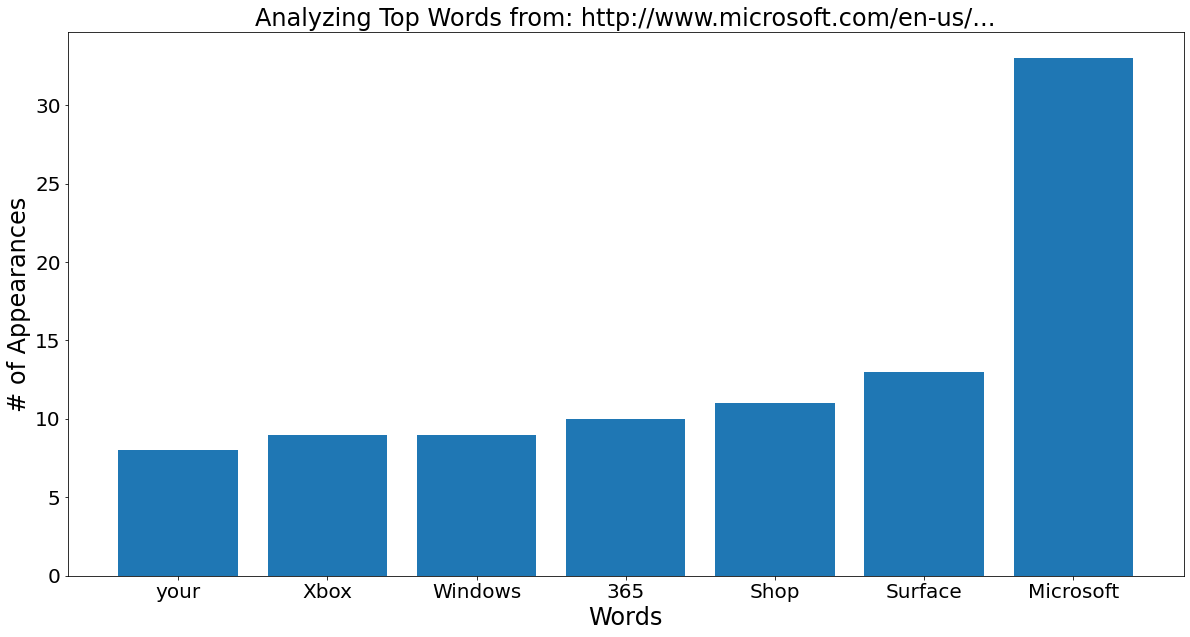

Would you like to scrape a website (y/n)? n
Thanks for analyzing! Come back again!


In [31]:
# graph results of top 7 words
def displayResults(words, site):
    count = [item[1] for item in words][::-1]     # reverses order
    word = [item[0] for item in words][::-1]      # reverses order
    
    plt.figure(figsize=(20, 10))   # define how large the figure appears

    plt.bar(word, count)

    plt.title("Analyzing Top Words from: {}...".format(site[:50]), fontname="Sans Serif", fontsize=24)
    plt.xlabel("Words", fontsize=24)
    plt.ylabel("# of Appearances", fontsize=24)
    plt.xticks(fontname="Sans Serif", fontsize=20)
    plt.yticks(fontname="Sans Serif", fontsize=20)

    plt.savefig('microsoft.png')
    plt.show()
    
# filter article words and hidden characters
def filterWaste(word):
    bad_words = ('the', 'a', 'in', 'of', 'to', 'you', '\xa0', 'and', 'at', 'on', 'for', 'from', 'is', 'that', 'are', 'be', '-', 'as', '&', 'they', 'with',
                 'how', 'was', 'her', 'him', 'i', 'has', '|', 'his')
    
    if word.lower() in bad_words:
        return False
    else:
        return True
    
# filter out all elements that do not contain text that appears on site
def filterTags(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    
    if isinstance(element, Comment):
        return False
    
    return True

# request site and top 7 most used words
def scrape(site):    
    page = requests.get(site)
    
    soup = BeautifulSoup(page.content, 'html.parser')
    
    text = soup.find_all(text=True)     # will get all text within the document
    
    visible_text = filter(filterTags, text)
    
    word_count = {}

    for text in visible_text:
        words = text.replace('\n', '').replace('\t', '').split(' ')   # replace all hidden chars

        words = list(filter(filterWaste, words))
        
        for word in words:
            if word != '':
                if word in word_count:
                    word_count[word] += 1
                else:
                    word_count[word] = 1
                     
    word_count = sorted(word_count.items(), key=lambda kv: kv[1], reverse=True)        
    
    return word_count[:7]
            
# main loop should ask if user wants to scrape, then what site to scrape
while input('Would you like to scrape a website (y/n)? ') == 'y':
    try:
        clear_output()
    
        site = input('Enter a website to analyze: ')
    
        top_words = scrape(site)
        
        top_word = top_words[0]   # tuple of (word, count)
        
        print("The top word is: {}".format(top_word[0]))
        
        displayResults(top_words, site)
    except:
        print('Something went wrong, please try again.')
    
print('Thanks for analyzing! Come back again!')